### Matplotlib

Although it is very easy to create visualizations, it’s much harder to produce good ones.

There are two primary uses for data visualization:

- To explore data
- To communicate data


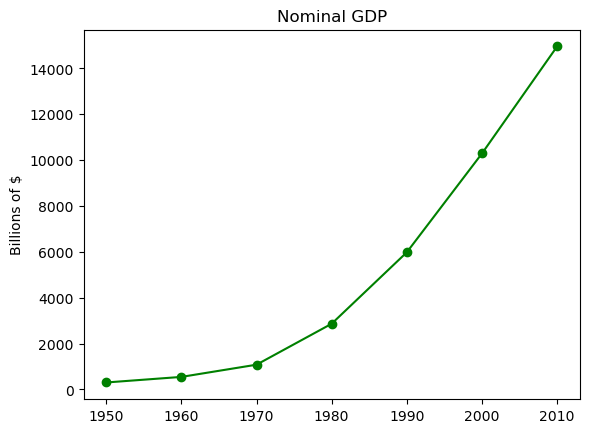

In [10]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

### Bar Charts
A bar chart is a good choice when you want to show how some quantity varies among some discrete set of items.

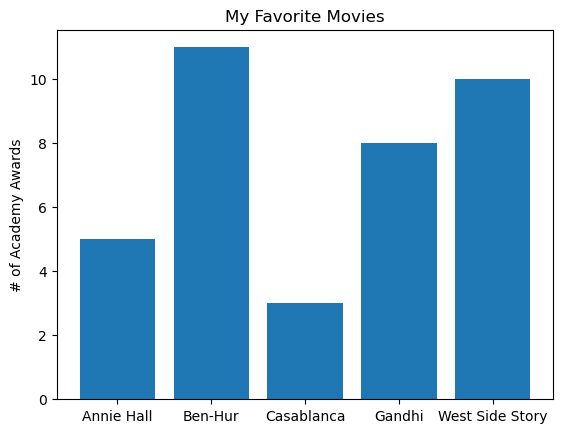

In [9]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies")     # add a title
plt.ylabel("# of Academy Awards")   # label the y-axis

# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

plt.show()

[80, 90, 90, 80, 70, 0, 80, 80, 90, 60, 70, 70, 0]
[80, 90, 90, 80, 70, 0, 80, 80, 100, 60, 70, 70, 0]


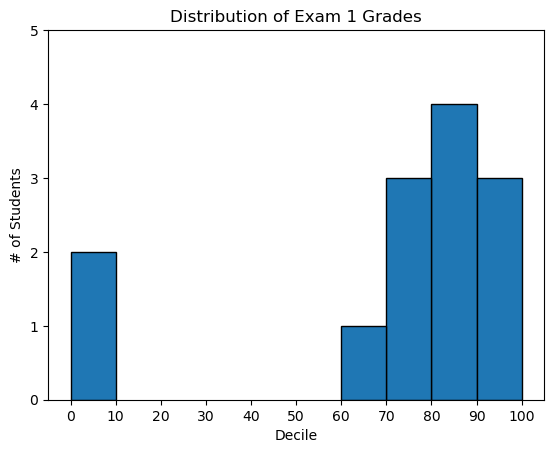

In [19]:
'''
A bar chart can also be a good choice for plotting histograms of bucketed numeric values,
in order to visually explore how the values are distributed:
'''

from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

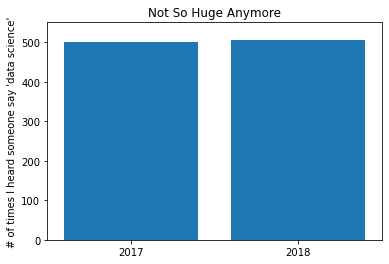

In [5]:
'''
 When creating bar charts it is considered especially bad form for your y-axis not to start at 0, 
 since this is an easy way to mislead people
'''

mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
# plt.axis([2016.5, 2018.5, 499, 506])
# plt.title("Look at the 'Huge' Increase!")

# we use more sensible axes, and it looks far less impressive
plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")

plt.show()

### Line charts
These are a good choice for showing **trends**


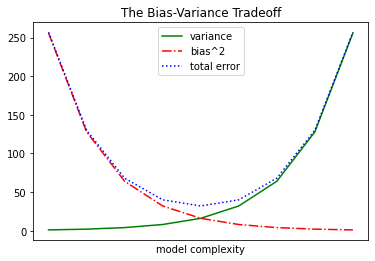

In [6]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

### Scatterplots
A scatterplot is the right choice for visualizing the relationship between two paired sets of data.

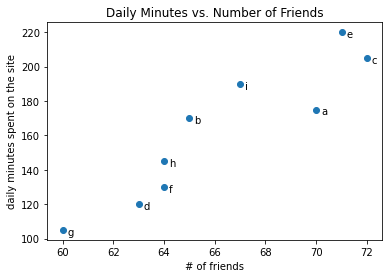

In [7]:
'''
The relationship between the number of friends your users have 
and the number of minutes they spend on the site every day
'''

friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

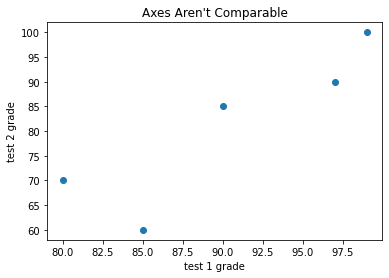

In [10]:
'''
If you’re scattering comparable variables, 
you might get a misleading picture if you let matplotlib choose the scale
'''
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

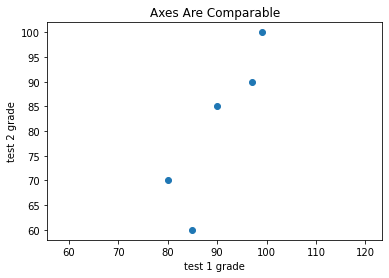

In [8]:
'''
If we include a call to plt.axis("equal"), 
the plot more accurately shows that most of the variation occurs on test 2.
'''

test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.axis("equal")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

# Matplotlib Practice Exercises

## 1. Basic Line Plot
**Objective:** Get familiar with plotting a simple line graph.

**Exercise:**  
- Create a line plot of the function $ y = 2x + 1 $ for $ x $ values ranging from -10 to 10.  
- Label the x-axis as "X Values" and the y-axis as "Y Values."  
- Add a title "Simple Line Plot."

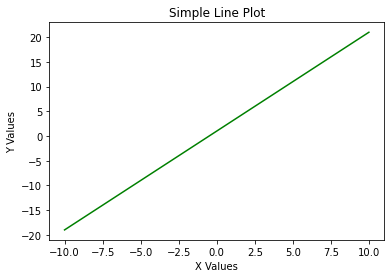

In [17]:
from matplotlib import pyplot as plt

x_axis = [x for x in range(-10, 11)]
y_axis = [(x * 2) + 1 for x in x_axis]

plt.plot(x_axis, y_axis, color="green", linestyle="solid")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Simple Line Plot")
plt.show()

## 2. Customizing a Scatter Plot
**Objective:** Learn how to create a scatter plot with different colors and sizes.

**Exercise:**  
- Generate 50 random points for $ x $ and $ y $ between 0 and 100.  
- Use a scatter plot where the size of each point is a random value.  
- Color the points based on their $ y $-value using a colormap (e.g., `viridis`).  
- Add a color bar, axis labels, and a title.

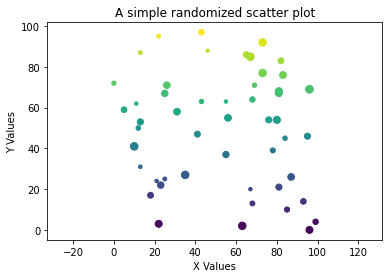

In [2]:
import random
from matplotlib import pyplot as plt

x_values = [random.randint(0, 100) for i in range(51)]
y_values = [random.randint(0, 100) for i in range(51)]

plt.scatter(x_values, y_values, c = y_values, cmap="viridis", s = [random.randint(10, 60) for i in range(51)]) #c = y_values co nghia la gan cac mau theo chieu truc y, neu dung x_values se la theo truc x
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("A simple randomized scatter plot")
plt.axis("equal")
plt.show()

## 3. Multi-Line Plot with Legends
**Objective:** Learn how to plot multiple lines and add a legend.

**Exercise:**  
- Plot the functions $ y = x^2 $ and $ y = x^3 $ on the same graph for $ x $ values from -10 to 10.  
- Use different colors and line styles for each function.  
- Add a legend in the upper left corner.  
- Customize the grid and set limits for both axes.

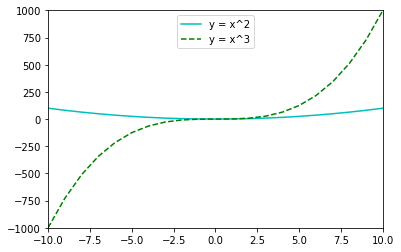

In [28]:
from matplotlib import pyplot as plt

x_values_1 = [x for x in range(-10, 11)]
y_values_1 = [x * x for x in x_values_1]
y_values_2 = [x * x * x for x in x_values_1]

plt.plot(x_values_1, y_values_1, "c-", label="y = x^2")
plt.plot(x_values_1, y_values_2, "g--", label="y = x^3")

plt.legend(loc=9)
plt.axis([-10, 10, -1000, 1000])
plt.show()

## 4. Bar Chart for Categorical Data
**Objective:** Learn how to visualize categorical data using a bar chart.

**Exercise:**  
- Create a bar chart showing the number of students who prefer different programming languages:  
  - Python: 45  
  - Java: 30  
  - C++: 20  
  - JavaScript: 35  
- Use different colors for each bar.  
- Add data labels on top of each bar.  
- Try to rotate x-axis labels.


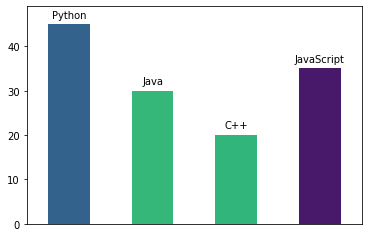

In [30]:
from matplotlib import pyplot as plt

prog_lang_name = ["Python", "Java", "C++", "JavaScript"]
num_students = [45, 30, 20, 35]
color_map = plt.cm.get_cmap("viridis")
bars = plt.bar(range(len(prog_lang_name)), num_students, 0.5, color=[color_map.colors[random.randint(0, len(color_map.colors) - 1)] for i in range(len(color_map.colors) - 1)])
# plt.xticks(range(len(prog_lang_name)), prog_lang_name)
plt.xticks([])
for _, (bar, label) in enumerate(zip(bars, prog_lang_name)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, #lay coordinate de dat label vao
             label, ha='center', va='bottom') # muon hieu vi sao la bottom thi len matplotlib web ma tim ve vertical alignment\
plt.axis([-0.5, len(prog_lang_name) - 0.5, 0, max(num_students) + (max(num_students) // 10)]) #chinh lai axis thi phai chinh ca x ca y nen theo truc x se la lui ve ben trai them 0.5 va lui ve ben phai 0.5
# de label khong bi extend vuot qua graph thi phai cho len cao them 10 don vi
plt.show()

## 5. Subplots with Different Chart Types
**Objective:** Learn how to create multiple plots in one figure.

**Exercise:**  
- Create a figure with **four subplots** arranged in a 2x2 grid:  
  1. A line plot of $ y = \sin(x) $ for $ x $ from 0 to $ 2\pi $.  
  2. A histogram of 1000 random numbers from a normal distribution.  
  3. A pie chart showing the percentage of students in different classes (Class A: 50, Class B: 30, Class C: 20).  
  4. A scatter plot of 100 random points with colors indicating a third random variable.  
- Adjust spacing to prevent overlapping.  
- Add titles for each subplot.

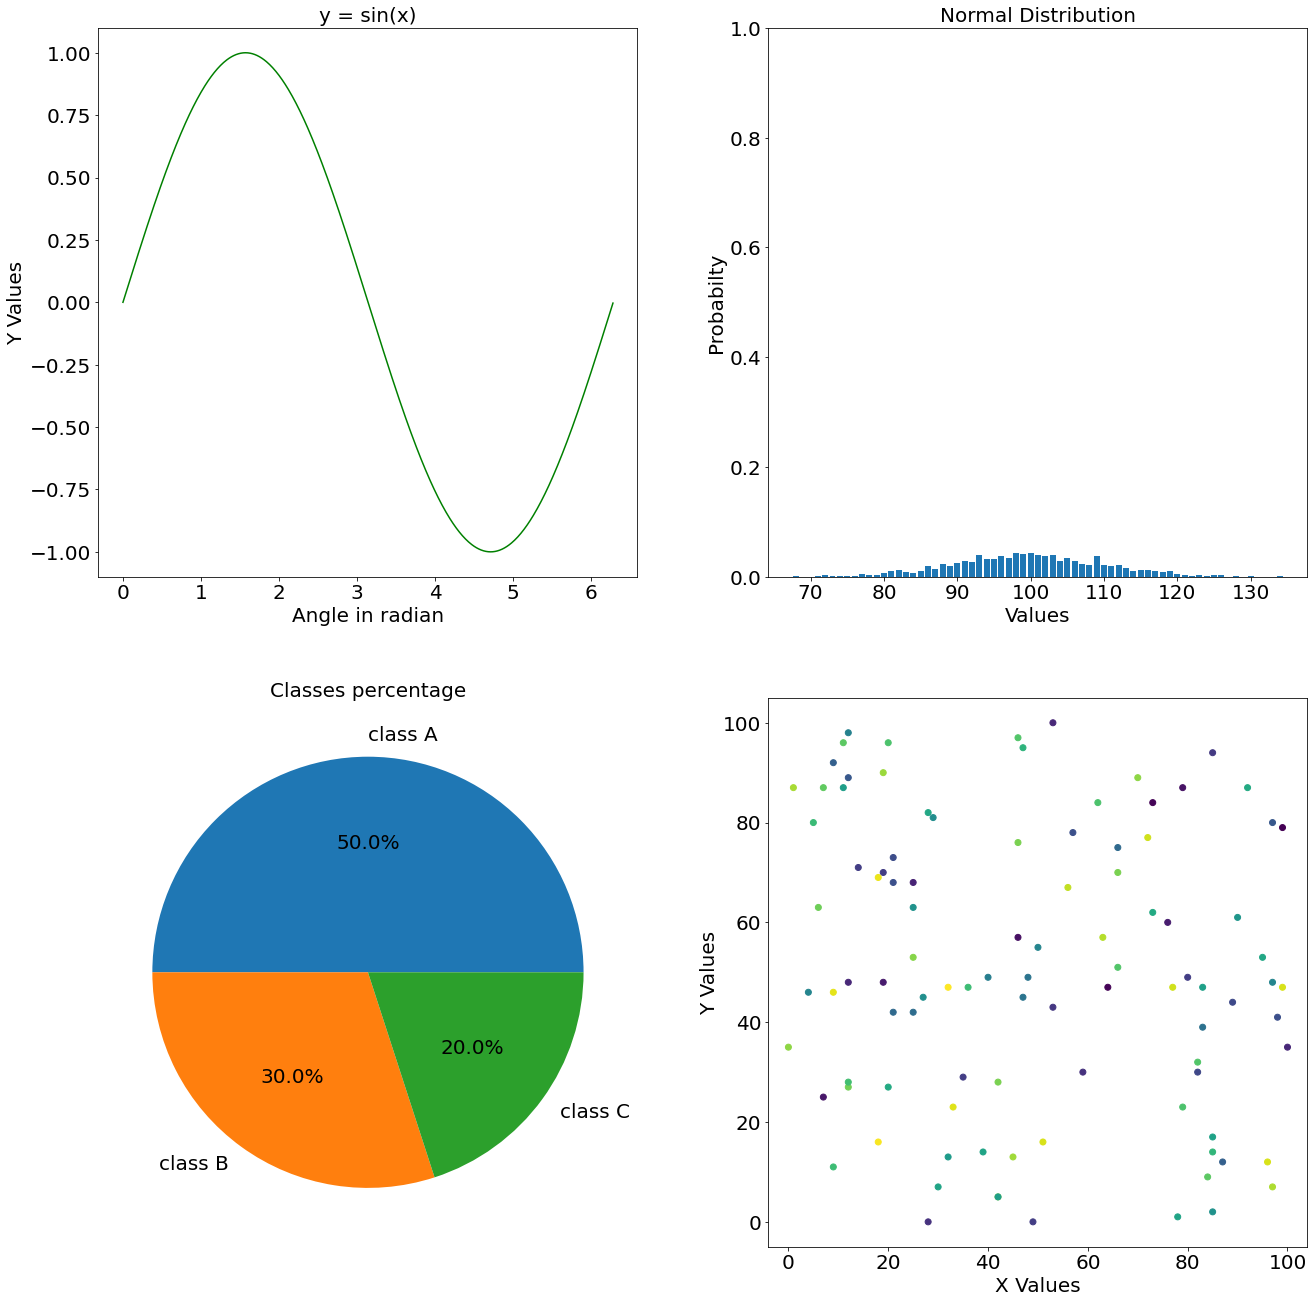

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
from typing import List
from collections import Counter

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20)) #figsize(20, 20) la size cua tung graph
fig.tight_layout(pad=10.0) #spacing between graphs

plt.subplot(2,2,1)
x = np.arange(0, 2*np.pi, 0.01)
y = np.sin(x)
plt.plot(x, y, color="green")
plt.xlabel("Angle in radian", size=20)
plt.ylabel("Y Values", size=20)
plt.title("y = sin(x)", size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.subplot(2,2,2)
randomized: List[int] = [int(random.normalvariate(100, 10)) for i in range(1000)]
count = Counter(randomized)
dict_count = dict(count)
plt.bar(list(dict_count.keys()), [num/len(randomized) for num in list(dict_count.values())])
plt.xlabel("Values", size=20)
plt.ylabel("Probabilty", size=20)
plt.title("Normal Distribution", size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim(0, 1)

plt.subplot(2,2,3)
label = ["class A", "class B", "class C"]
percentage = [50/100, 30/100, 20/100]
plt.pie(percentage, labels = label, textprops={'fontsize': 20}, autopct='%1.1f%%')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.title("Classes percentage", size = 20)

plt.subplot(2,2,4)
random_vars_x = [random.randint(0, 100) for i in range(100)]
random_vars_y = [random.randint(0, 100) for i in range(100)]
plt.scatter(random_vars_x, random_vars_y, c=[random.randint(0, 100) for i in range(100)], cmap="viridis")
plt.xlabel("X Values", size = 20)
plt.ylabel("Y Values", size = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axis("equal")

plt.show()